In [1]:
!py -m pip install xgboost

zsh:1: command not found: py


In [2]:
!py -m pip install pandas

zsh:1: command not found: py


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from wordcloud import WordCloud

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import metrics


pd.set_option('display.max_columns', None)

In [4]:
cust_records =  pd.read_excel("Telco_customer_churn.xlsx")
cust_records.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
cust_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
cust_records.duplicated().sum()

0

In [7]:
cust_records.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [8]:
# Convert 'Total Charges' to numeric, setting errors='coerce' to replace non-numeric entries with NaN
cust_records['Total Charges'] = pd.to_numeric(cust_records['Total Charges'], errors='coerce')

# Check for missing values that were non-numeric entries
print(cust_records['Total Charges'].isnull().sum())

11


In [9]:
# Replace NaN with the mean or median of the column
cust_records['Total Charges'] = cust_records['Total Charges'].fillna(cust_records['Total Charges'].median())

Text(0.5, 1.0, 'Distribution of Churn Value')

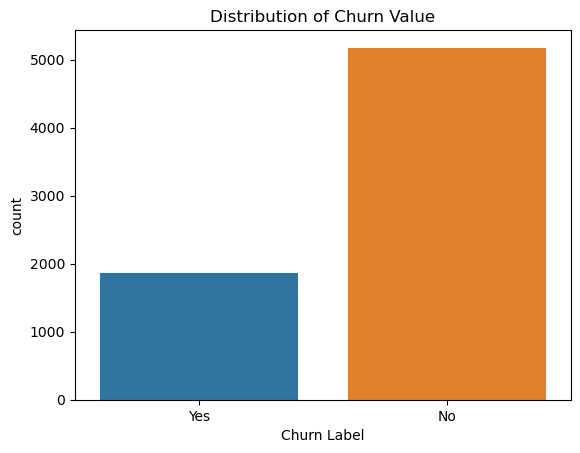

In [10]:
sns.countplot(x = "Churn Label", data = cust_records)
plt.title("Distribution of Churn Value")

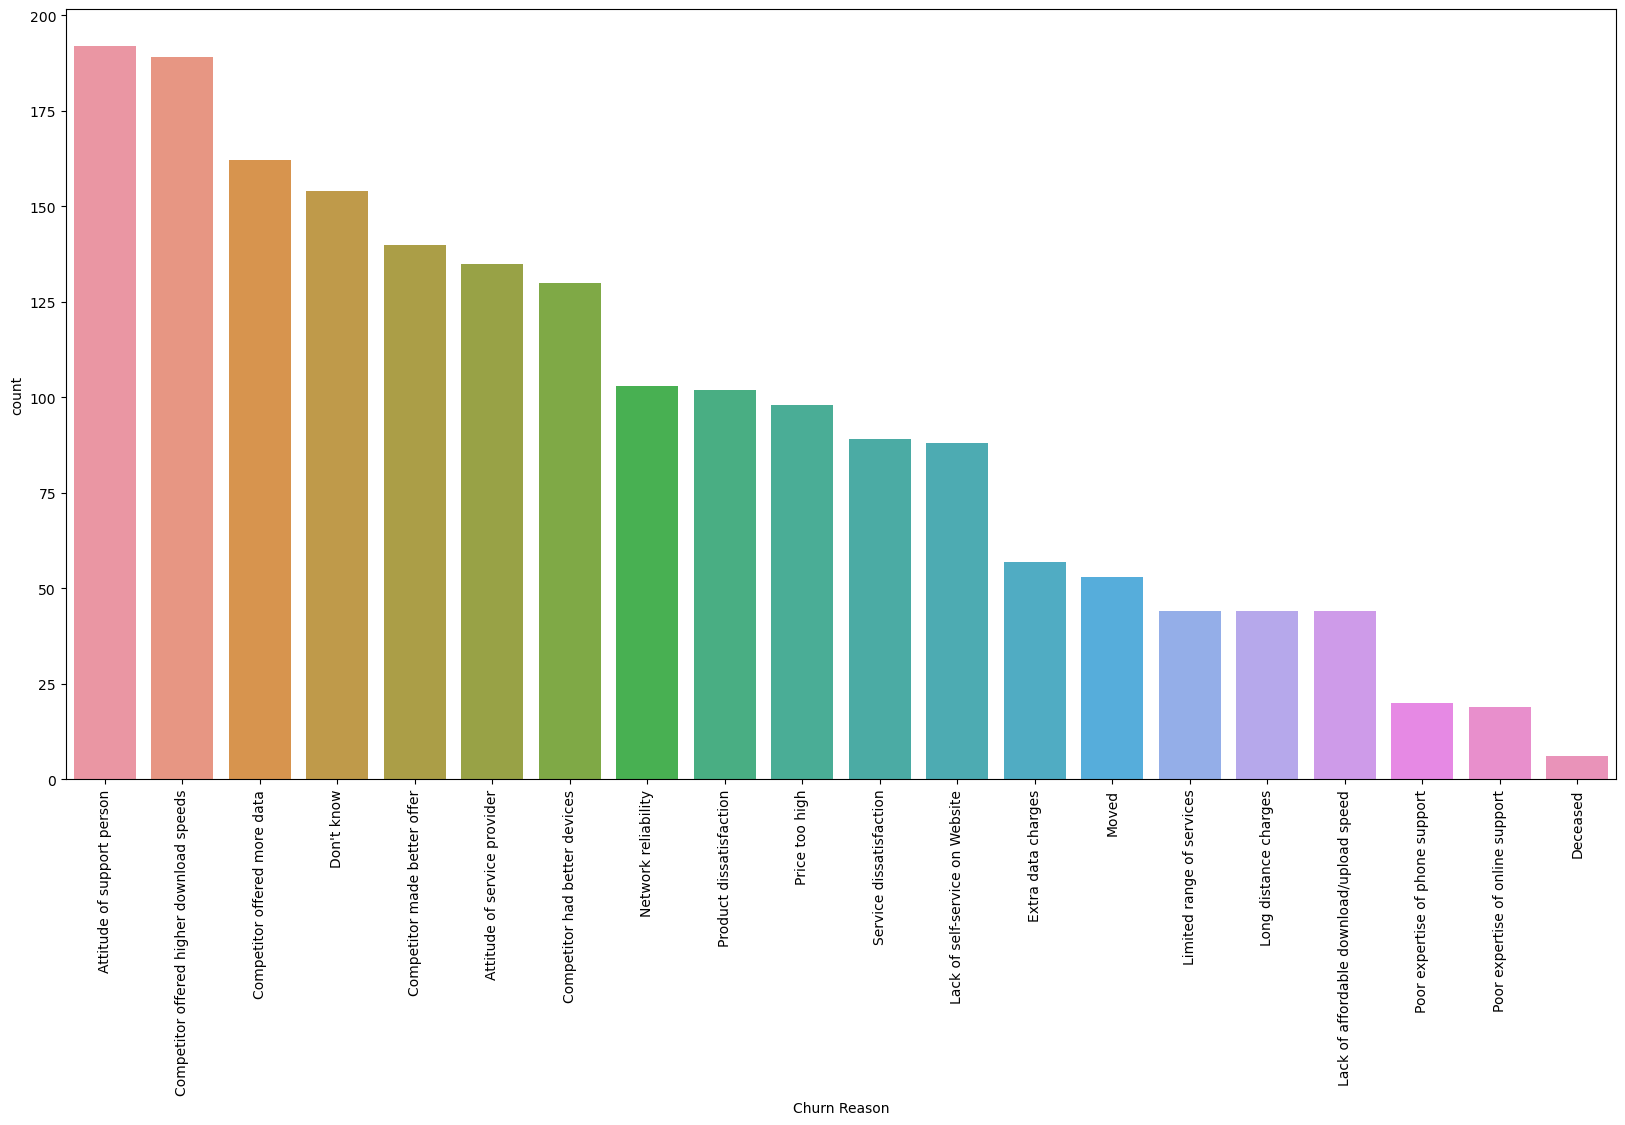

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(x='Churn Reason', data = cust_records,order = cust_records['Churn Reason'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [12]:
cust_records = cust_records[cust_records['Churn Reason']!= 'Deceased']
cust_records.shape

(7037, 33)

> 7 people have been deceased. We have to remove them.

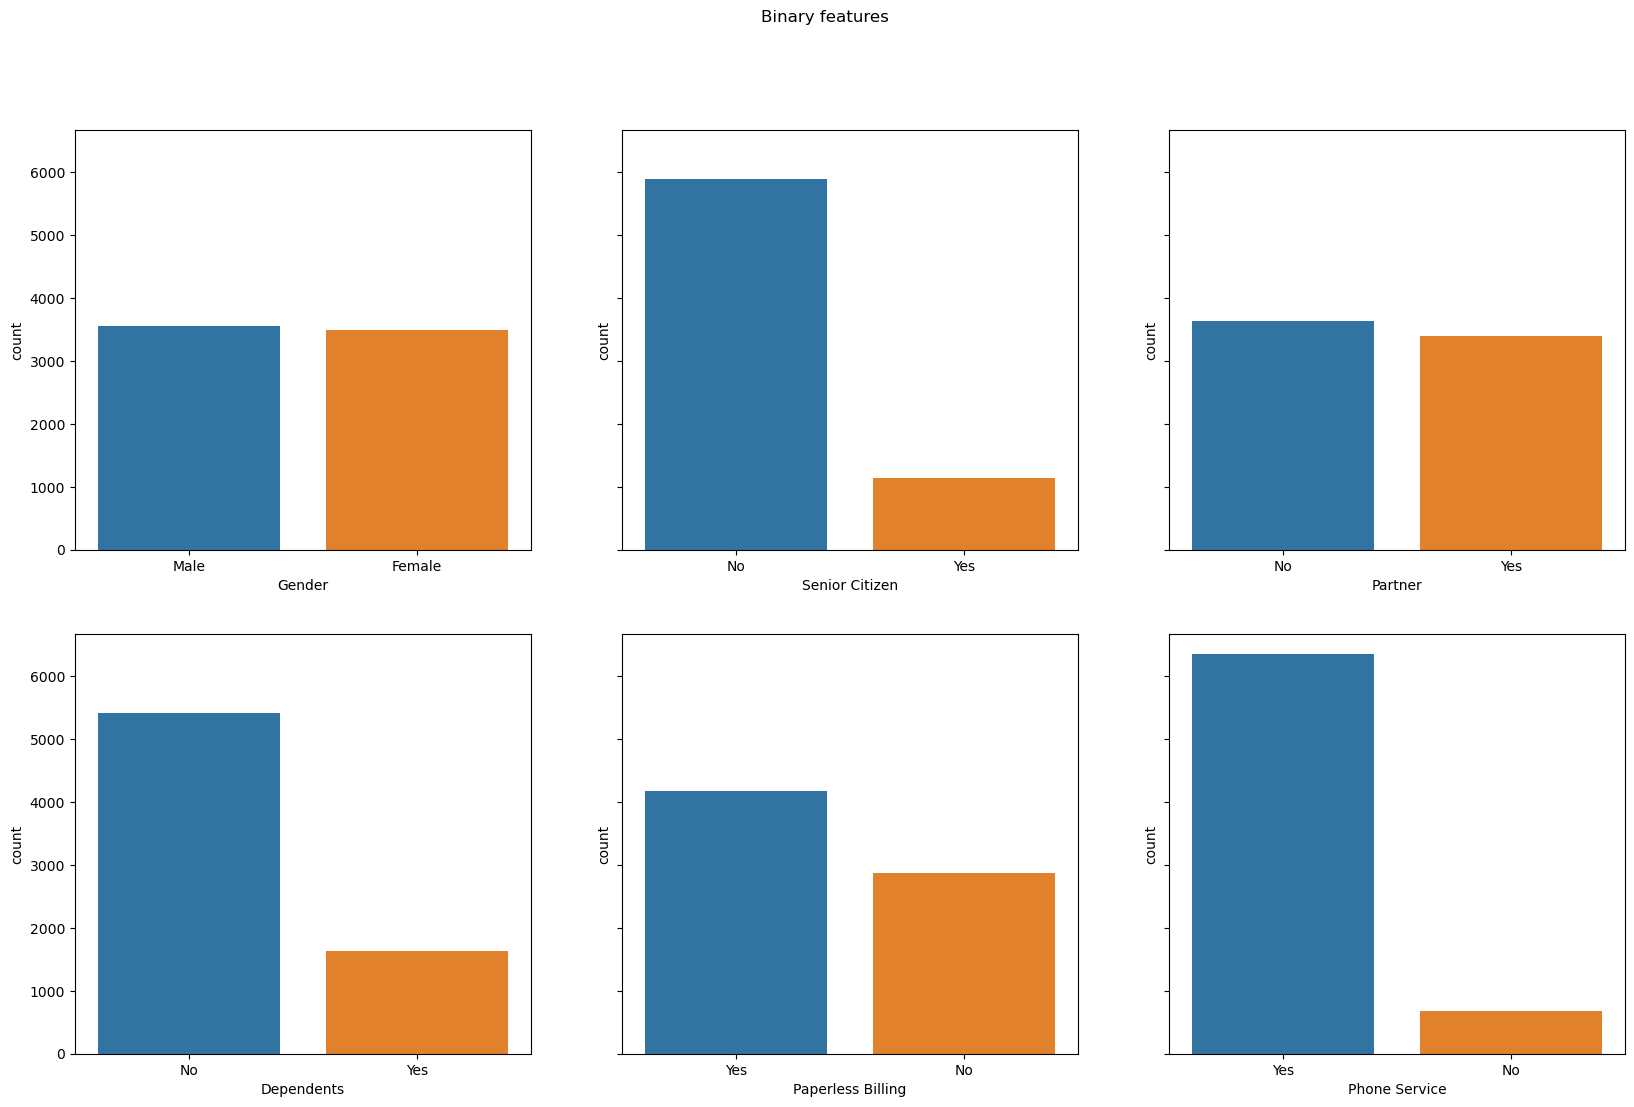

In [13]:
fig, axes = plt.subplots(2,3, figsize = (20,12), sharey = True)
plt.suptitle("Binary features")
sns.countplot(x = "Gender", data = cust_records, ax=axes[0,0])
sns.countplot(x = "Senior Citizen", data = cust_records, ax=axes[0,1])
sns.countplot(x = "Partner", data = cust_records, ax=axes[0,2])
sns.countplot(x = "Dependents", data = cust_records, ax=axes[1,0])
sns.countplot(x = "Paperless Billing", data = cust_records, ax=axes[1,1])
sns.countplot(x = "Phone Service", data = cust_records, ax=axes[1,2])
plt.show()

We can observe high imbalance in:
- 
Senior Citizen - Most of the customers are below the age of 65 year- s
Dependents - Majority do not live with any dependent (kids, parents et- c)
Phone Service - Most use phone service

In [14]:
cust_records[['Gender', 'Churn Value']].groupby(['Gender']).mean()

,Churn Value
Gender,
Female,0.268370
Male,0.261188


In [15]:
cust_records[['Senior Citizen', 'Churn Value']].groupby(['Senior Citizen']).mean()

,Churn Value
Senior Citizen,
No,0.235543
Yes,0.415789


In [16]:
cust_records[['Partner','Dependents','Churn Value']].groupby(['Partner','Dependents']).mean()

Churn Value
Partner Dependents             
No      No             0.343628
        Yes            0.165563
Yes     No             0.294458
        Yes            0.042264

In [17]:
cust_records[['Phone Service', 'Churn Value']].groupby(['Phone Service']).mean()

,Churn Value
Phone Service,
No,0.248164
Yes,0.266520


<Axes: xlabel='Multiple Lines', ylabel='count'>

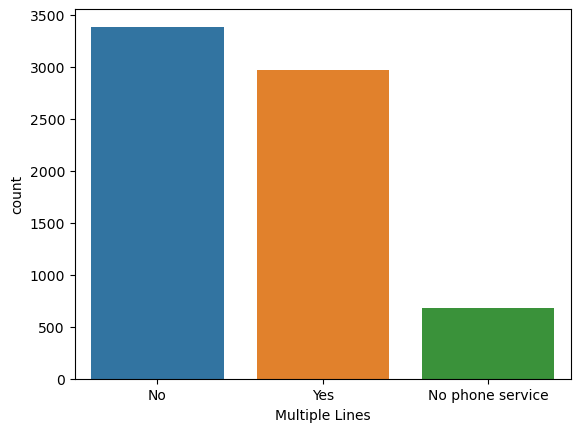

In [18]:
sns.countplot(x = 'Multiple Lines',data = cust_records)

In [19]:
cust_records[['Multiple Lines', 'Churn Value']].groupby(['Multiple Lines']).mean().sort_values('Churn Value',ascending=False)

,Churn Value
Multiple Lines,
Yes,0.285618
No,0.249779
No phone service,0.248164


<Axes: xlabel='Contract', ylabel='count'>

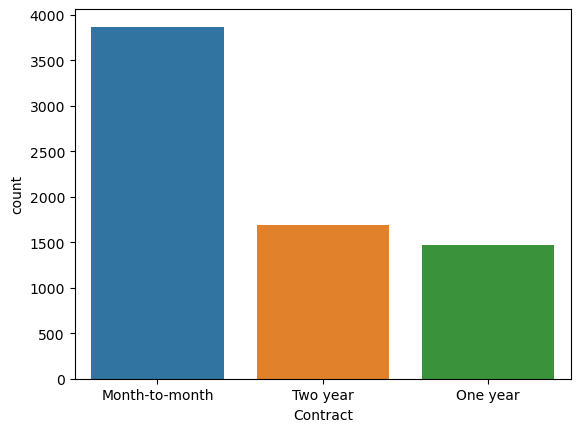

In [20]:
sns.countplot(x = 'Contract',data = cust_records)

In [21]:
cust_records[['Contract', 'Churn Value']].groupby(['Contract']).mean().sort_values('Churn Value',ascending=False)

,Churn Value
Contract,
Month-to-month,0.426208
One year,0.112695
Two year,0.028319


<Axes: xlabel='Internet Service', ylabel='count'>

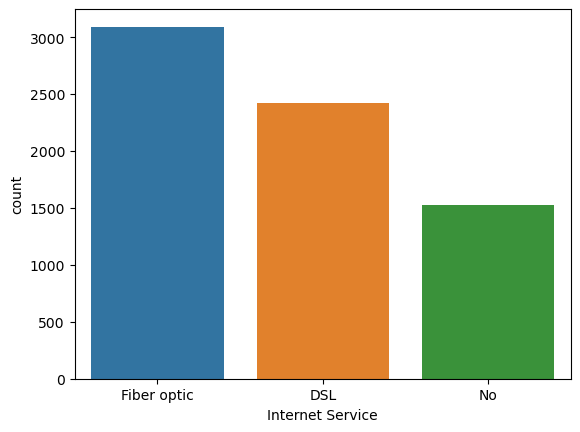

In [22]:
sns.countplot(x = 'Internet Service',data = cust_records,order= cust_records['Internet Service'].value_counts().index)

In [23]:
cust_records[['Internet Service', 'Churn Value']].groupby(['Internet Service']).mean().sort_values('Churn Value',ascending=False)

,Churn Value
Internet Service,
Fiber optic,0.418176
DSL,0.188921
No,0.074050


<Axes: xlabel='Payment Method', ylabel='count'>

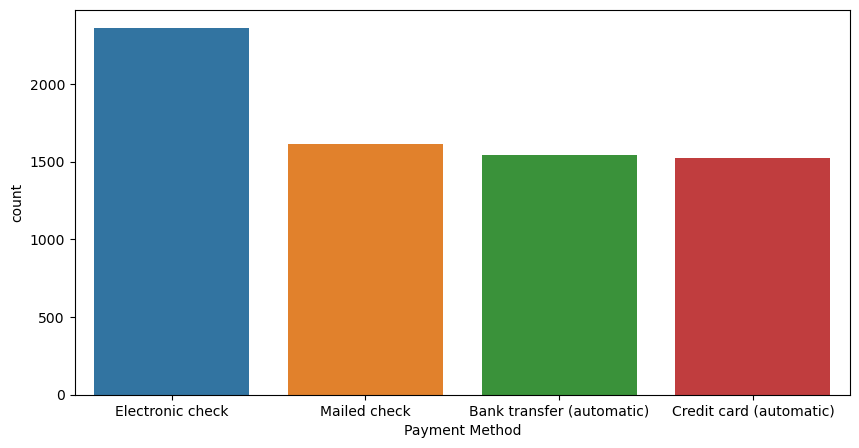

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Payment Method', data = cust_records, order = cust_records['Payment Method'].value_counts().index)

In [25]:
cust_records[['Payment Method', 'Churn Value']].groupby(['Payment Method']).mean().sort_values('Churn Value',ascending=False)

,Churn Value
Payment Method,
Electronic check,0.451462
Mailed check,0.191067
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431


/Users/sharathchandramummadi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Tenure vs Churn Value')

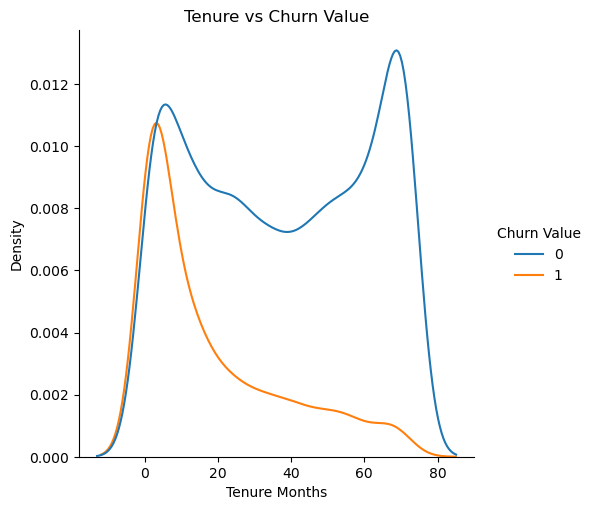

In [26]:
sns.displot(data = cust_records, x = "Tenure Months", hue = "Churn Value", kind = "kde")
plt.title('Tenure vs Churn Value')

/Users/sharathchandramummadi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Monthly Charges vs Churn Value')

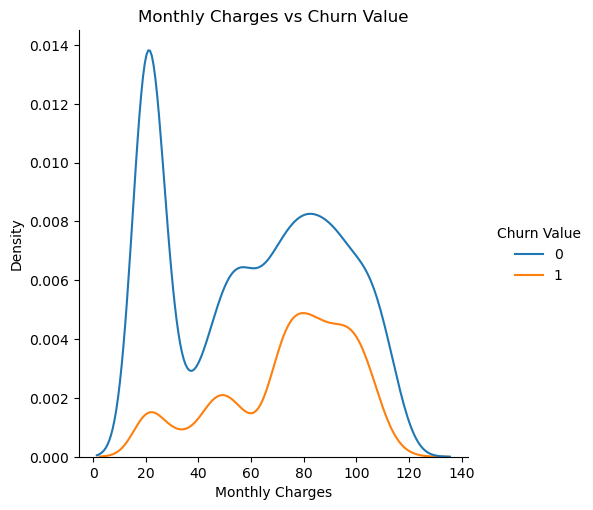

In [27]:
sns.displot(data = cust_records, x= 'Monthly Charges', hue = 'Churn Value', kind = "kde")
plt.title('Monthly Charges vs Churn Value')

In [28]:
cust_records[['Monthly Charges', 'Churn Value', 'Tenure Months']].groupby('Churn Value').mean()

,Monthly Charges,Tenure Months
Churn Value,,
0,61.265124,37.569965
1,74.460655,18.008588


Average monthly charges for churned customers is about 13 dollars higher and churned customers tend to leave the company about 20 months earlier than the not churned ones.

## Churn vs Poor Activation or Free tier

In [29]:
monthPA = cust_records[(cust_records['Tenure Months'] == 1) & (cust_records['Churn Value']==1)  & (cust_records.Contract=='Month-to-month')]
yearPA = cust_records[(cust_records['Tenure Months'] <= 12) & (cust_records['Churn Value']==1)  & (cust_records.Contract=='One year')]
poorActivation = pd.concat([monthPA,yearPA])

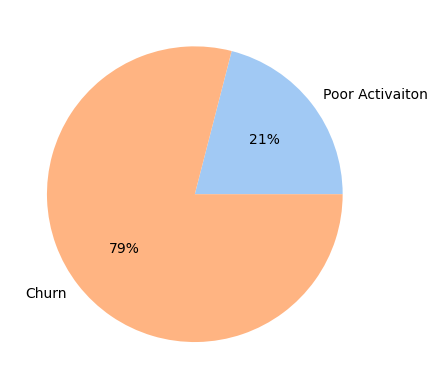

In [30]:
data_pie = [poorActivation.shape[0], cust_records[cust_records['Churn Value'] == 1].shape[0] -  poorActivation.shape[0]]
colors = sns.color_palette('pastel')[0:5]
plt.pie(data_pie, labels = ['Poor Activaiton','Churn'], colors = colors, autopct='%.0f%%')
plt.show()

## Data Pre-processing

In [31]:
cust_records_without_PA =  cust_records.copy()
cond = cust_records_without_PA.CustomerID.isin(poorActivation.CustomerID)
cust_records_without_PA.drop(cust_records_without_PA[cond].index, inplace = True)
cust_records_without_PA

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [32]:
filtered = cust_records_without_PA.iloc[:, 9:]
churnReason = filtered['Churn Reason']
filtered.drop(['Gender','Total Charges','Churn Label','Churn Reason'], inplace = True, axis=1)
filtered.head()

,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Churn Value,Churn Score,CLTV
0,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1,86,3239
1,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1,67,2701
2,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,1,86,5372
3,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,1,84,5003
4,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,1,89,5340


## Scaling

In [33]:
scaler = MinMaxScaler()
filtered["Tenure Months"] = scaler.fit_transform(filtered[["Tenure Months"]])
filtered["Monthly Charges"] = scaler.fit_transform(filtered[["Monthly Charges"]])

In [34]:
categorical_features =  [i for i in filtered.columns if filtered[i].dtype == 'object']
categorical_features

['Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [35]:
encode_df =  pd.get_dummies(filtered, columns = categorical_features, drop_first = True)
encode_df

,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0.027778,0.354229,1,86,3239,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,0.027778,0.521891,1,67,2701,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
2,0.111111,0.809950,1,86,5372,False,False,True,True,False,True,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False
3,0.388889,0.861194,1,84,5003,False,True,True,True,False,True,True,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,True,False,True,False
4,0.680556,0.850249,1,89,5340,False,False,True,True,False,True,True,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.000000,0.028856,0,45,5306,False,False,False,True,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,False,True,True,False,False,False
7039,0.333333,0.662189,0,59,2140,False,True,True,True,False,True,False,False,False,True,False,False,False,True,False,True,False,True,False,True,True,False,True,False,False,True
7040,1.000000,0.845274,0,71,5560,False,True,True,True,False,True,True,False,False,False,False,True,False,True,False,False,False,True,False,True,True,False,True,True,False,False
7041,0.152778,0.112935,0,59,2793,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


## Model Implementation

### XG Boost

In [36]:
def split_data(final, random_state):
    # Splitting data into training and test sets
    X = final.drop('Churn Value', axis=1)
    Y = final['Churn Value']
    return train_test_split(X, Y, test_size=0.2, random_state=random_state)

In [37]:
X_train, X_test, Y_train, Y_test = split_data(encode_df,1)

In [38]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, Y_train)
xgb_train_pred = xgb_model.predict(X_train)
xgb_acc_train = accuracy_score(xgb_train_pred, Y_train)
print("Training Accuracy:",xgb_acc_train)


xgb_test_pred = xgb_model.predict(X_test)
xgb_acc_test = accuracy_score(xgb_test_pred, Y_test)
print("Test Accuracy:",xgb_acc_test)

best_xgb_model = XGBClassifier(learning_rate = 0.2, max_depth = 30, n_estimators =100)
best_xgb_model.fit(X_train, Y_train)

Training Accuracy: 0.9994356659142212
Test Accuracy: 0.9263157894736842


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Accuracy score on training data
train_pred = best_xgb_model.predict(X_train)
acc_train = accuracy_score(train_pred, Y_train)
print("Training Accuracy:",acc_train)

# Accuracy score on test data
test_pred = best_xgb_model.predict(X_test)
acc_test = accuracy_score(test_pred, Y_test)
print('Test Accuracy:', acc_test)

Training Accuracy: 1.0
Test Accuracy: 0.924812030075188


In [40]:
# Calculating F1-score
f1_test = f1_score(Y_test, test_pred)
print('F1-score:', f1_test)

F1-score: 0.8154981549815498


In [41]:
best_xgb_recall = recall_score(Y_test,test_pred)
best_xgb_precision = precision_score(Y_test, test_pred)
print("Best XGBClassification model's metrics:\n")
print("Accuracy on Training Data:", round(acc_train, 2))
print("Accuracy on Test Data:", round(acc_test,2))
print("Recall Score:", round(best_xgb_recall,2))
print("Precision Score:", round(best_xgb_precision,2))

Best XGBClassification model's metrics:

Accuracy on Training Data: 1.0
Accuracy on Test Data: 0.92
Recall Score: 0.82
Precision Score: 0.82


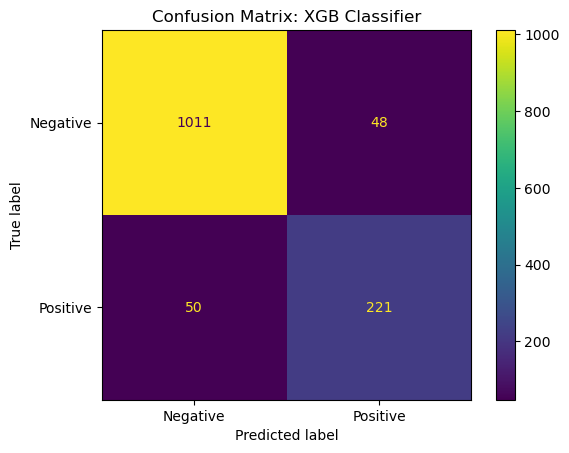

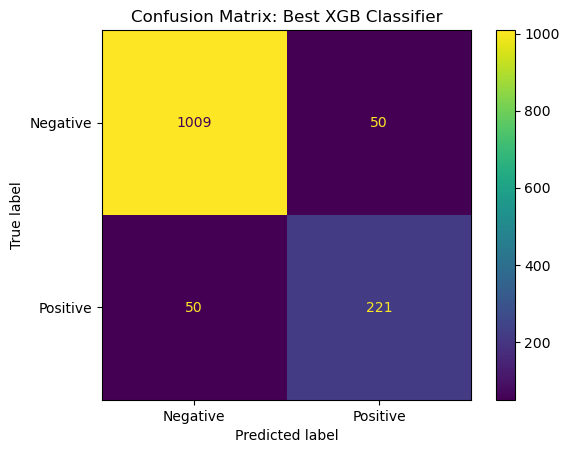

In [42]:
confusion_matrix = metrics.confusion_matrix(Y_test, xgb_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.title('Confusion Matrix: XGB Classifier')
plt.show()

confusion_matrix = metrics.confusion_matrix(Y_test, test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.title('Confusion Matrix: Best XGB Classifier')
plt.show()

In [43]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

def tune_hyperparameters(X_train, Y_train):
    # Define the model
    xgb_model = xgb.XGBClassifier()

    # Specify the hyperparameter space
    param_grid = {
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300],
        'subsample': [0.7, 0.8, 0.9]
    }
    
    # Setup the GridSearchCV
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')
    
    # Fitting the model with GridSearch
    grid_search.fit(X_train, Y_train)
    
    # Return the best estimator and the best hyperparameters
    return grid_search.best_estimator_, grid_search.best_params_

In [44]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def xgboost_model(final, random_state):
    X_train, X_test, Y_train, Y_test = split_data(final, random_state)
    return xgboost_model_post_data_split(X_train, X_test, Y_train, Y_test, random_state)


def xgboost_model_post_data_split(X_train, X_test, Y_train, Y_test, random_state):
    # Call the hyperparameter tuning function
    best_model, best_params = tune_hyperparameters(X_train, Y_train)
    
    # Predicting on training and test data using the best estimator
    xgb_train_pred = best_model.predict(X_train)
    xgb_test_pred = best_model.predict(X_test)
    
    # Calculating and printing the accuracy
    xgb_acc_train = accuracy_score(Y_train, xgb_train_pred)
    xgb_acc_test = accuracy_score(Y_test, xgb_test_pred)

    # Calculating precision, recall, and F1 score
    xgb_precision_test = precision_score(Y_test, xgb_test_pred, average='binary')
    xgb_recall_test = recall_score(Y_test, xgb_test_pred, average='binary')
    xgb_f1_test = f1_score(Y_test, xgb_test_pred, average='binary')
    
    print("Training Accuracy:", xgb_acc_train)
    print("Test Accuracy:", xgb_acc_test)
    print("Test Precision:", xgb_precision_test)
    print("Test Recall:", xgb_recall_test)
    print("Test F1 Score:", xgb_f1_test)
    print("Best Hyperparameters:", best_params)
    return xgb_acc_test, xgb_f1_test

In [45]:
xgb_acc_test_with_gradient, xgb_f1_test = xgboost_model(encode_df, 1)

Training Accuracy: 0.9471407072987208
Test Accuracy: 0.9345864661654135
Test Precision: 0.8333333333333334
Test Recall: 0.8487084870848709
Test F1 Score: 0.8409506398537477
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [46]:
print(xgb_acc_test_with_gradient)

0.9345864661654135


### Logistic Regression

In [47]:
def logistic_regression(X_train, Y_train, X_test, Y_test):
    log = LogisticRegression(max_iter = 10000)
    log.fit(X_train, Y_train)
    
    
    
    logi_train_pred = log.predict(X_train)
    logi_acc_train = accuracy_score(logi_train_pred, Y_train)
    print("Training Accuracy:",logi_acc_train)
    
    
    logi_test_pred = log.predict(X_test)
    logi_acc_test = accuracy_score(logi_test_pred, Y_test)
    print("Test Accuracy:",logi_acc_test)

    # Calculate F1-score on test data
    f1_test = f1_score(Y_test, logi_test_pred)
    print('F1-score:', f1_test)
    
    return logi_test_pred, logi_acc_test, f1_test

In [48]:
logi_test_pred, logi_acc_test, logi_f1_score = logistic_regression(X_train, Y_train, X_test, Y_test)

Training Accuracy: 0.9251316779533484
Test Accuracy: 0.9308270676691729
F1-score: 0.8308823529411765


In [49]:
print([logi_test_pred, logi_acc_test, logi_f1_score])

[array([0, 0, 1, ..., 0, 0, 1]), 0.9308270676691729, 0.8308823529411765]


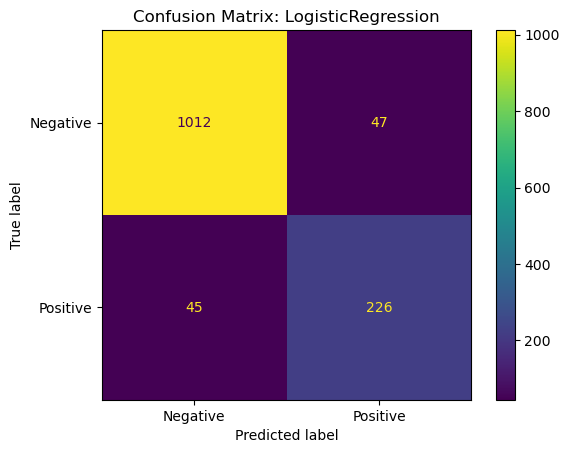

In [50]:
confusion_matrix = metrics.confusion_matrix(Y_test, logi_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.title('Confusion Matrix: LogisticRegression')
plt.show()

### Descion Tree

In [51]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, Y_train)

In [52]:
dtree_train_pred = dtree.predict(X_train)
dtree_acc_train = accuracy_score(dtree_train_pred, Y_train)
print("Training Accuracy:",dtree_acc_train)


dtree_test_pred = dtree.predict(X_test)
dtree_acc_test = accuracy_score(dtree_test_pred, Y_test)
print("Test Accuracy:",dtree_acc_test)

Training Accuracy: 1.0
Test Accuracy: 0.9270676691729324


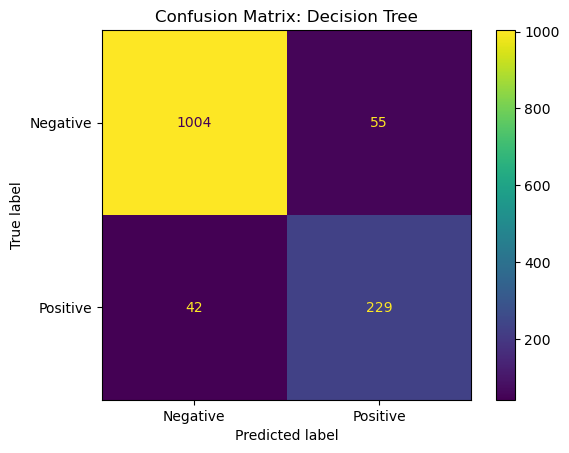

In [53]:
confusion_matrix = metrics.confusion_matrix(Y_test, dtree_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.title('Confusion Matrix: Decision Tree')
plt.show()

In [54]:
dtree_recall = recall_score(Y_test,dtree_test_pred)
dtree_precision = precision_score(Y_test, dtree_test_pred)
print("dtreeClassification model's metrics:\n")
print("Accuracy on Training Data:", round(dtree_acc_train, 2))
print("Accuracy on Test Data:", round(dtree_acc_test,2))
print("Recall Score:", round(dtree_recall,2))
print("Precision Score:", round(dtree_precision,2))

dtreeClassification model's metrics:

Accuracy on Training Data: 1.0
Accuracy on Test Data: 0.93
Recall Score: 0.85
Precision Score: 0.81


In [55]:
# Calculate F1-scoredtree_
dtree_f1_test = f1_score(Y_test, dtree_test_pred)
print('F1-score:', dtree_f1_test)

F1-score: 0.8252252252252252


### Random

In [56]:
random = RandomForestClassifier()
random.fit(X_train, Y_train)

random_train_pred = random.predict(X_train)
random_acc_train = accuracy_score(random_train_pred, Y_train)
print("Training Accuracy:",random_acc_train)


random_test_pred = random.predict(X_test)
random_acc_test = accuracy_score(random_test_pred, Y_test)
print("Test Accuracy:",random_acc_test)

Training Accuracy: 1.0
Test Accuracy: 0.9278195488721804


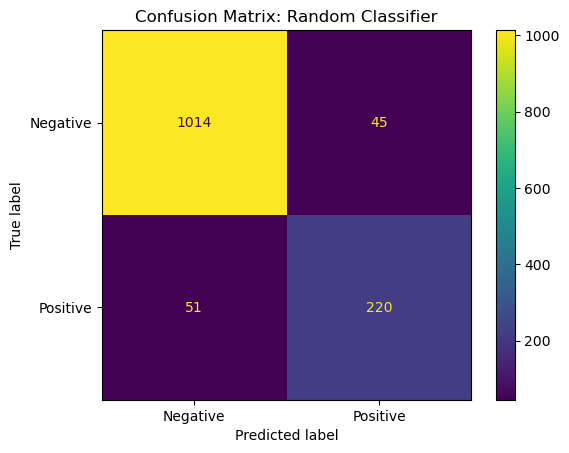

In [57]:
confusion_matrix = metrics.confusion_matrix(Y_test, random_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.title('Confusion Matrix: Random Classifier')
plt.show()

In [58]:
random_recall = recall_score(Y_test,random_test_pred)
random_precision = precision_score(Y_test, random_test_pred)
print("randomClassification model's metrics:\n")
print("Accuracy on Training Data:", round(random_acc_train, 2))
print("Accuracy on Test Data:", round(random_acc_test,2))
print("Recall Score:", round(random_recall,2))
print("Precision Score:", round(random_precision,2))

randomClassification model's metrics:

Accuracy on Training Data: 1.0
Accuracy on Test Data: 0.93
Recall Score: 0.81
Precision Score: 0.83


In [59]:
# Calculate F1-score
random_f1_test = f1_score(Y_test, random_test_pred)
print('F1-score:', random_f1_test)

F1-score: 0.8208955223880597


In [60]:
print([xgb_acc_test_with_gradient, acc_test, logi_acc_test, dtree_acc_test, random_acc_test])

[0.9345864661654135, 0.924812030075188, 0.9308270676691729, 0.9270676691729324, 0.9278195488721804]


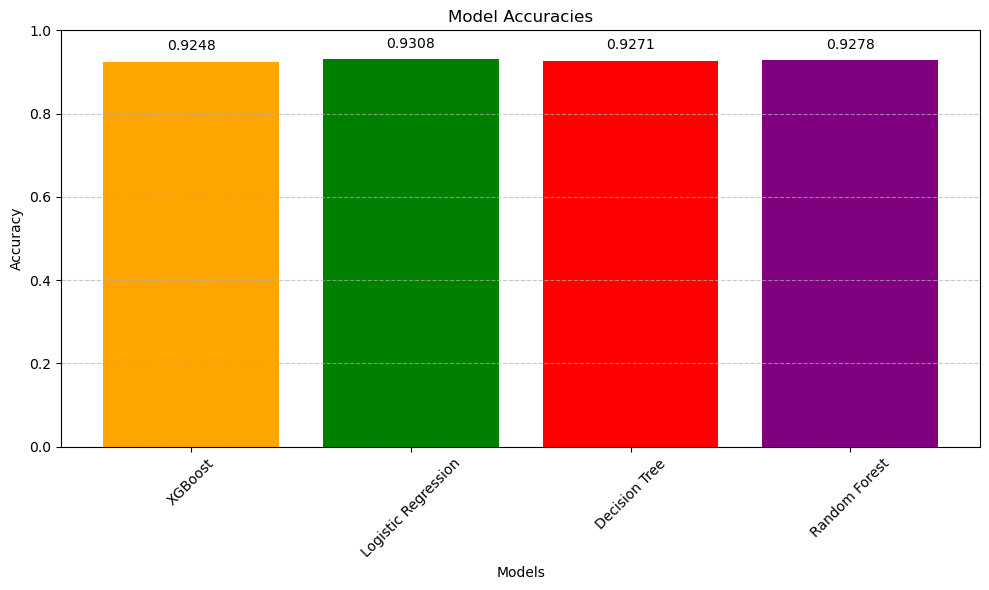

In [61]:
import matplotlib.pyplot as plt

# Model names
models_part1 = ['XGBoost', 'Logistic Regression', 'Decision Tree', 'Random Forest']

# Accuracies
accuracies_part1 = [acc_test, logi_acc_test, dtree_acc_test, random_acc_test]

# Plotting
plt.figure(figsize=(10, 6))
bars_part1 = plt.bar(models_part1, accuracies_part1, color=['orange', 'green', 'red', 'purple'])
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Limit y-axis from 0 to 1 for accuracy
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding accuracy values on top of each bar
for bar, acc in zip(bars_part1, accuracies_part1):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{acc:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [62]:
print([f1_test, logi_f1_score, dtree_f1_test, random_f1_test])

[0.8154981549815498, 0.8308823529411765, 0.8252252252252252, 0.8208955223880597]


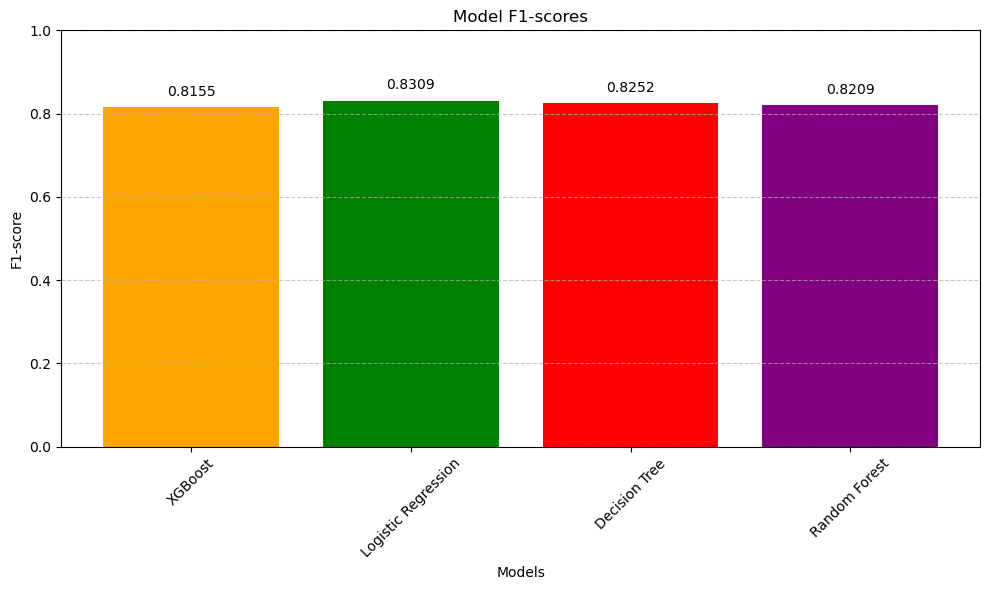

In [63]:
import matplotlib.pyplot as plt

# Model names
models_part1 = ['XGBoost', 'Logistic Regression', 'Decision Tree', 'Random Forest']

# F1-scores
f1_scores_part1 = [f1_test, logi_f1_score, dtree_f1_test, random_f1_test]

# Plotting
plt.figure(figsize=(10, 6))
bars_part1 = plt.bar(models_part1, f1_scores_part1, color=['orange', 'green', 'red', 'purple'])
plt.title('Model F1-scores')
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.ylim(0, 1)  # Limit y-axis from 0 to 1 for F1-score
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding F1-score values on top of each bar
for bar, f1 in zip(bars_part1, f1_scores_part1):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{f1:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


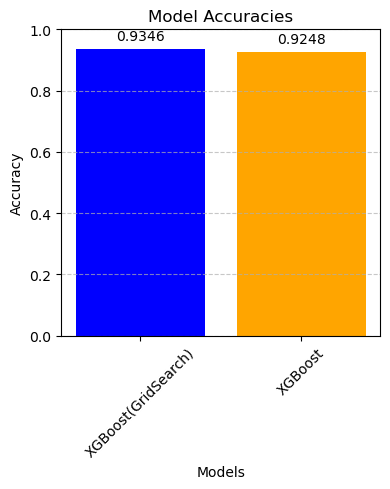

In [64]:
import matplotlib.pyplot as plt

# Model names
models_part2 = ['XGBoost(GridSearch)', 'XGBoost']

# Accuracies
accuracies_part2 = [xgb_acc_test_with_gradient, acc_test]

# Plotting
plt.figure(figsize=(4, 5))  # Smaller figure size
bars_part2 = plt.bar(models_part2, accuracies_part2, color=['blue', 'orange'])
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Limit y-axis from 0 to 1 for accuracy
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding accuracy values on top of each bar
for bar, acc in zip(bars_part2, accuracies_part2):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{acc:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


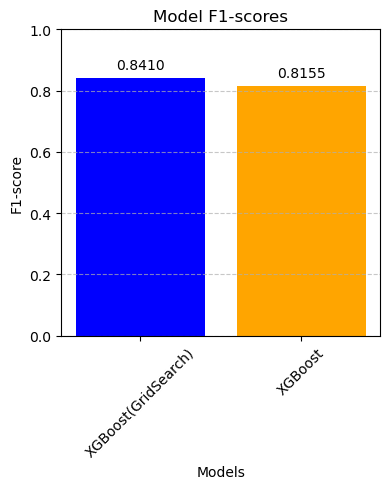

In [65]:
import matplotlib.pyplot as plt

# Model names
models_part2 = ['XGBoost(GridSearch)', 'XGBoost']

# F1-scores
f1_scores_part2 = [xgb_f1_test, f1_test]

# Plotting
plt.figure(figsize=(4, 5))  # Smaller figure size
bars_part2 = plt.bar(models_part2, f1_scores_part2, color=['blue', 'orange'])
plt.title('Model F1-scores')
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.ylim(0, 1)  # Limit y-axis from 0 to 1 for F1-score
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding F1-score values on top of each bar
for bar, f1 in zip(bars_part2, f1_scores_part2):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{f1:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Up-sampling

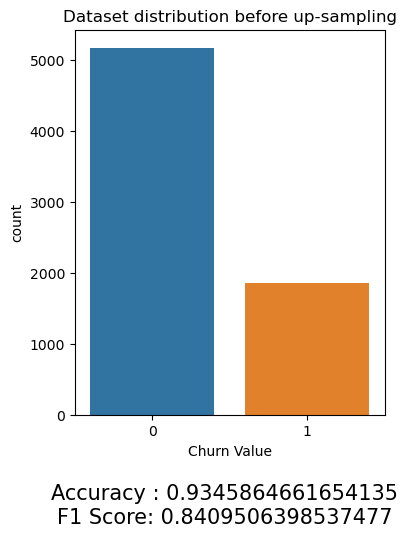

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Resizing the figure
plt.figure(figsize=(4, 5))

# Plotting
sns.countplot(x="Churn Value", data=cust_records)

# Adding label
plt.title('Dataset distribution before up-sampling')

# Adding content below the graph
plt.figtext(0.5, -0.1, "Accuracy : "+str(xgb_acc_test_with_gradient)+"\nF1 Score: "+str(xgb_f1_test), wrap=True, horizontalalignment='center', fontsize=15)

plt.show()


In [67]:
churn = encode_df[encode_df['Churn Value']==1]
nchurn = encode_df[encode_df['Churn Value'] == 0]

churned_upsampled = resample(churn, 
                             replace = True, 
                             n_samples = len(nchurn),
                             random_state = 1)

final = pd.concat([churned_upsampled, nchurn])

In [68]:
final.head()

,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
1334,0.625000,0.021393,1,87,5398,False,False,False,True,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
288,0.347222,0.717910,1,100,5801,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,True,False,True,False
1374,0.069444,0.505473,1,74,3368,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1139,0.111111,0.572139,1,92,4174,True,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
898,0.708333,0.751741,1,83,4788,True,True,False,True,False,True,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False


In [69]:
upsampling_accuracy, upsampling_f1_score = xgboost_model(final, 1)

Training Accuracy: 0.9952887170814206
Test Accuracy: 0.966183574879227
Test Precision: 0.9405940594059405
Test Recall: 0.996186844613918
Test F1 Score: 0.9675925925925926
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


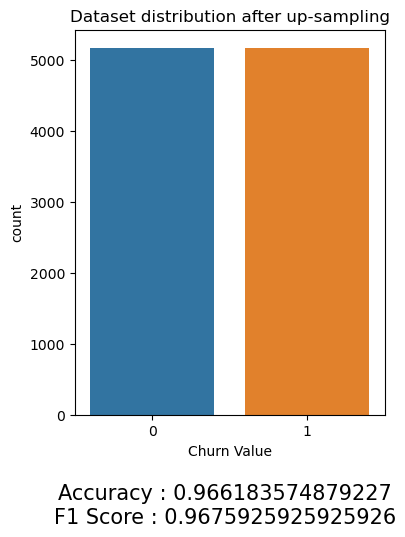

In [70]:
# Resizing the figure
plt.figure(figsize=(4, 5))

# Plotting
sns.countplot(x="Churn Value", data=final)

# Adding label
plt.title('Dataset distribution after up-sampling')

# Adding content below the graph
plt.figtext(0.5, -0.1, "Accuracy : "+str(upsampling_accuracy)+"\nF1 Score : "+str(upsampling_f1_score), wrap=True, horizontalalignment='center', fontsize=15)

plt.show()


## Down Sampling

<Axes: xlabel='Churn Value', ylabel='count'>

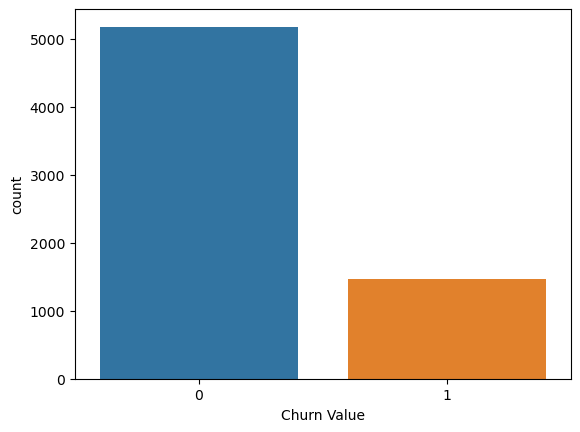

In [71]:
sns.countplot(x = "Churn Value", data = encode_df)

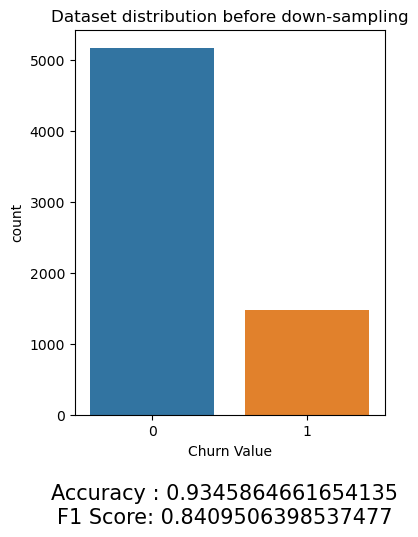

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Resizing the figure
plt.figure(figsize=(4, 5))

# Plotting
sns.countplot(x="Churn Value", data=encode_df)

# Adding label
plt.title('Dataset distribution before down-sampling')

# Adding content below the graph
plt.figtext(0.5, -0.1, "Accuracy : "+str(xgb_acc_test_with_gradient)+"\nF1 Score: "+str(xgb_f1_test), wrap=True, horizontalalignment='center', fontsize=15)

plt.show()


Text(0.5, 1.0, 'After Down Sampling')

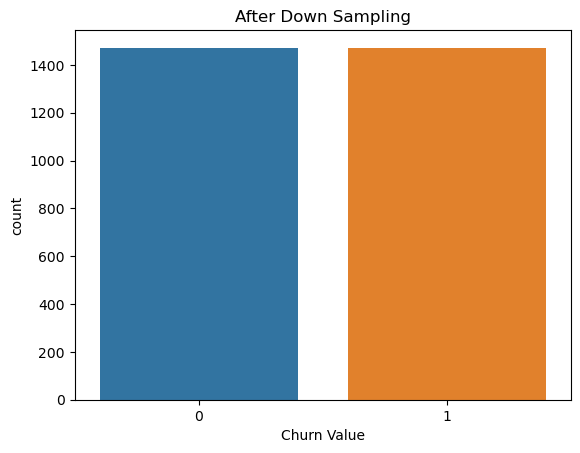

In [73]:
from sklearn.utils import resample

# Separate majority and minority classes
majority = encode_df[encode_df['Churn Value'] == 0]
minority = encode_df[encode_df['Churn Value'] == 1]

# Downsample majority class
majority_downsampled = resample(majority,
                                replace=False,
                                n_samples=len(minority),
                                random_state=42)

# Combine minority class with downsampled majority class
downsampled_data = pd.concat([majority_downsampled, minority])

sns.countplot(x = "Churn Value", data = downsampled_data)
plt.title("After Down Sampling")

In [74]:
downsampling_accuracy, downsampling_f1_score = xgboost_model(downsampled_data, 42)

Training Accuracy: 0.9341825902335457
Test Accuracy: 0.9422750424448217
Test Precision: 0.9273927392739274
Test Recall: 0.9590443686006825
Test F1 Score: 0.9429530201342282
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.7}


In [75]:
X_train, X_test, Y_train, Y_test = split_data(downsampled_data,42)

In [76]:
logi_test_pred, logi_acc_test, logi_f1_score = logistic_regression(X_train, Y_train, X_test, Y_test)

Training Accuracy: 0.9210191082802548
Test Accuracy: 0.9185059422750425
F1-score: 0.9180887372013652


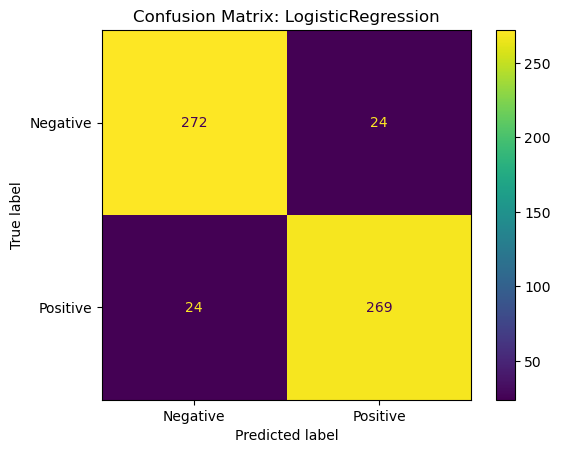

In [77]:
confusion_matrix = metrics.confusion_matrix(Y_test, logi_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.title('Confusion Matrix: LogisticRegression')
plt.show()

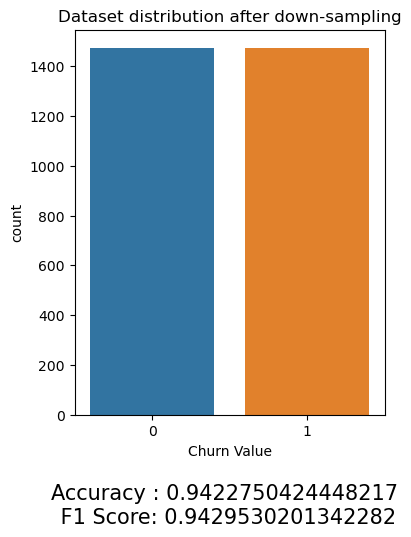

In [78]:
# Resizing the figure
plt.figure(figsize=(4, 5))

# Plotting
sns.countplot(x="Churn Value", data=downsampled_data)

# Adding label
plt.title('Dataset distribution after down-sampling')

# Adding content below the graph
plt.figtext(0.5, -0.1, "Accuracy : "+str(downsampling_accuracy)+"\n F1 Score: "+str(downsampling_f1_score), wrap=True, horizontalalignment='center', fontsize=15)

plt.show()


## SMOTE for balancing

In [79]:
X_train, X_test, Y_train, Y_test = split_data(encode_df,42)

<Axes: xlabel='Churn Value', ylabel='count'>

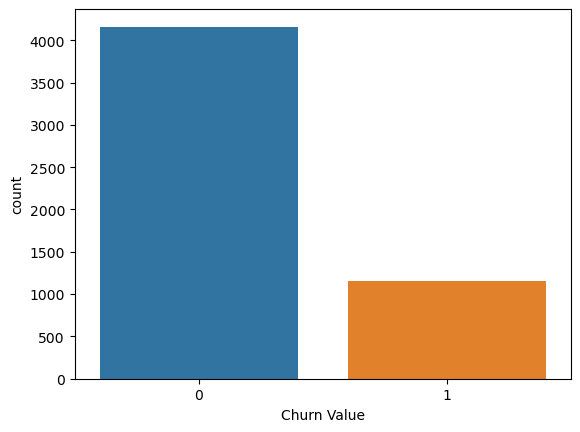

In [80]:
sns.countplot(x="Churn Value", data=pd.concat([X_train, Y_train], axis=1))


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Resizing the figure
plt.figure(figsize=(4, 5))

# Plotting
sns.countplot(x='Churn Value', data=pd.concat([X_train, Y_train]))

# Adding label
plt.title('Dataset distribution before SMOTE')

# Adding content below the graph
plt.figtext(0.5, -0.1, "Accuracy : "+str(xgb_acc_test_with_gradient)+"\nF1 Score: "+str(xgb_f1_test), wrap=True, horizontalalignment='center', fontsize=15)

plt.show()


ValueError: Could not interpret input 'Churn Value'

In [ ]:
#!py -m pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [ ]:
sns.countplot(x="Churn_Value", data=smote_applied_sample)
plt.title("After applying SMOTE for Sampling")

ValueError: Could not interpret input 'Churn_Value'

In [ ]:
smote_accuracy, smote_f1_score = xgboost_model_post_data_split(X_train_smote,X_test, Y_train_smote,Y_test,42)

Training Accuracy: 0.9508413461538462
Test Accuracy: 0.9338345864661655
Test Precision: 0.8114754098360656
Test Recall: 0.939873417721519
Test F1 Score: 0.8709677419354839
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


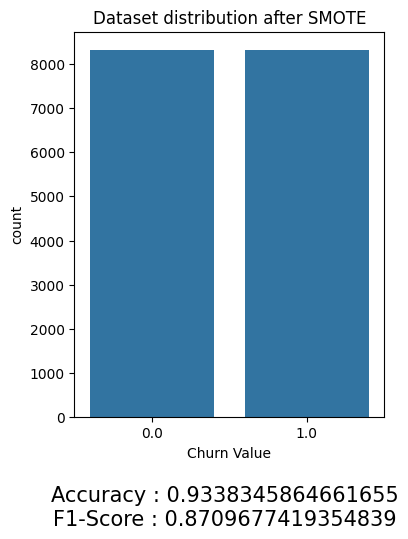

In [ ]:
# Resizing the figure
plt.figure(figsize=(4, 5))

# Plotting
sns.countplot(x="Churn Value", data=pd.concat([X_train_smote, Y_train_smote]))

# Adding label
plt.title('Dataset distribution after SMOTE')

# Adding content below the graph
plt.figtext(0.5, -0.1, "Accuracy : "+str(smote_accuracy)+"\nF1-Score : "+str(smote_f1_score), wrap=True, horizontalalignment='center', fontsize=15)

plt.show()


## Feature Importance

In [ ]:
columns = X_train.columns

NameError: name 'X_train' is not defined

In [ ]:
def compute_feature_importance(voting, weights):

    feature_importance = dict()
    for est in voting.estimators_:
        feature_importance[str(est)] = est.feature_importances_
    

    fe_scores = [0]*len(list(feature_importance.values())[0])

    
    for idx, imp_score in enumerate(feature_importance.values()):
        ## print(imp_score)
        imp_score_with_weight = imp_score*weights[idx]
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
    return fe_scores

## Analysis of churn reason

1863


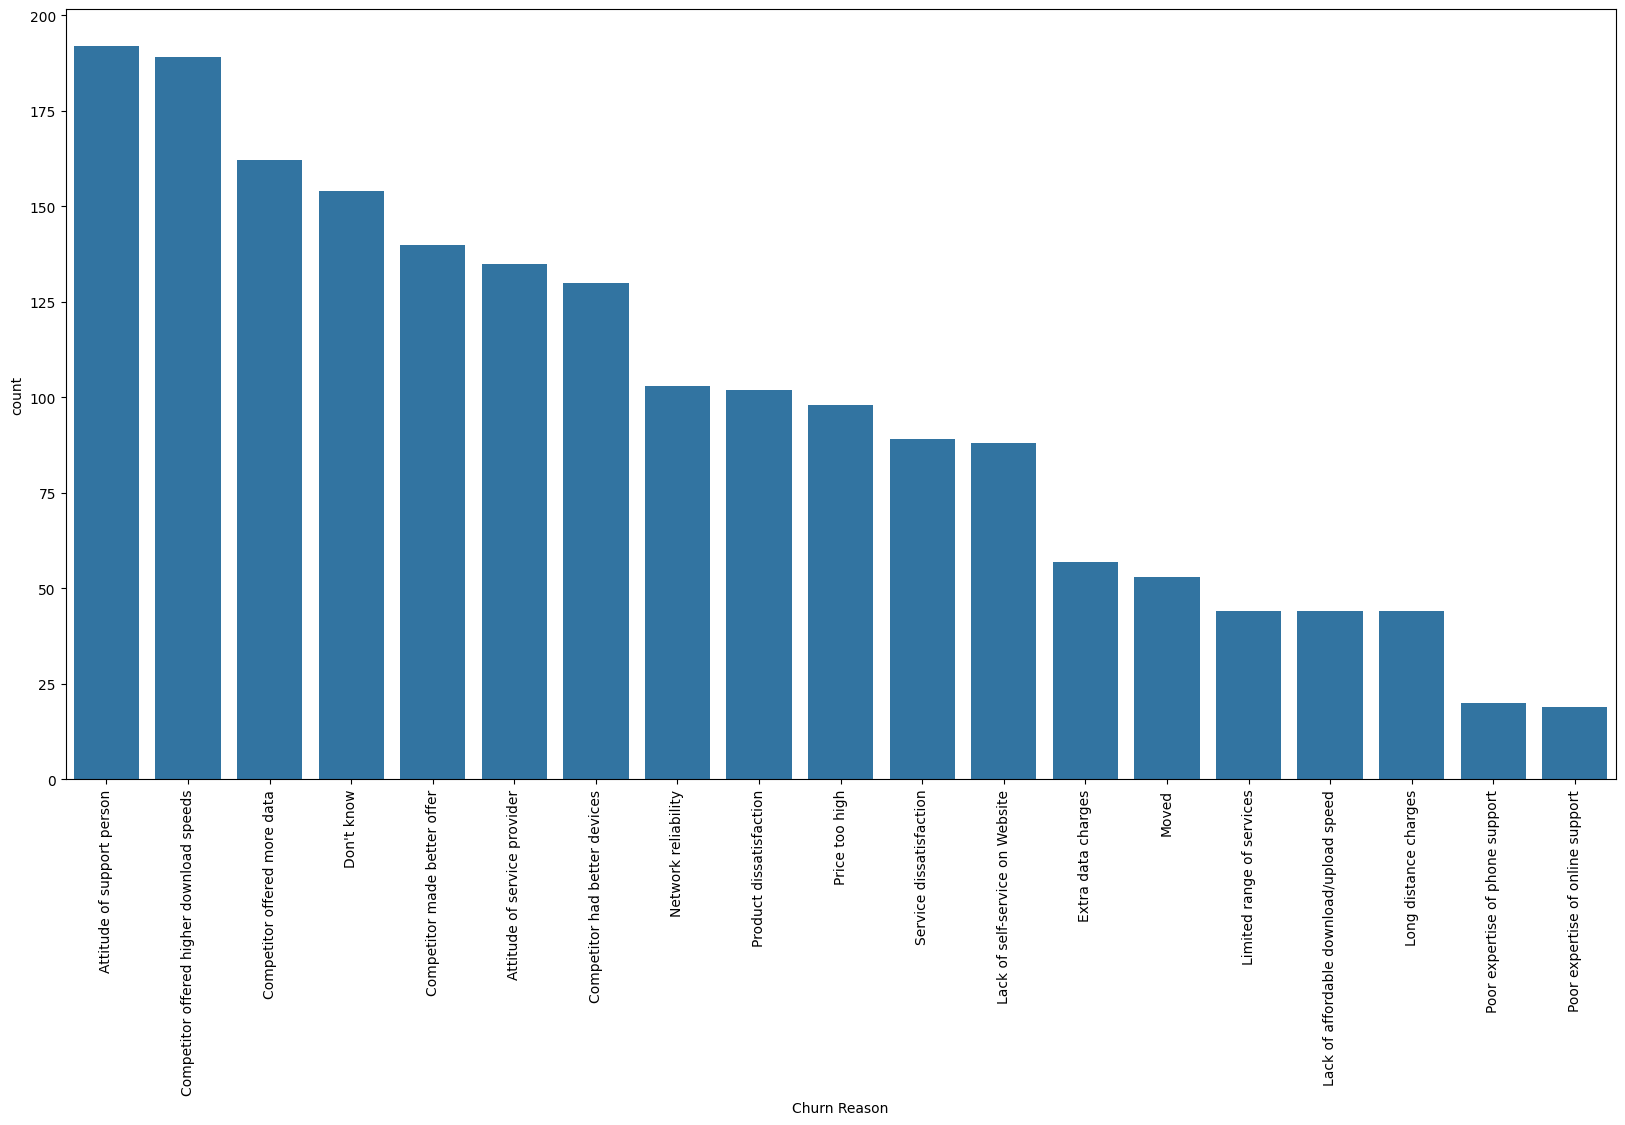

In [ ]:
print(cust_records['Churn Value'].sum())
plt.figure(figsize=(20,10))
sns.countplot(x='Churn Reason', data = cust_records,order = cust_records['Churn Reason'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

391


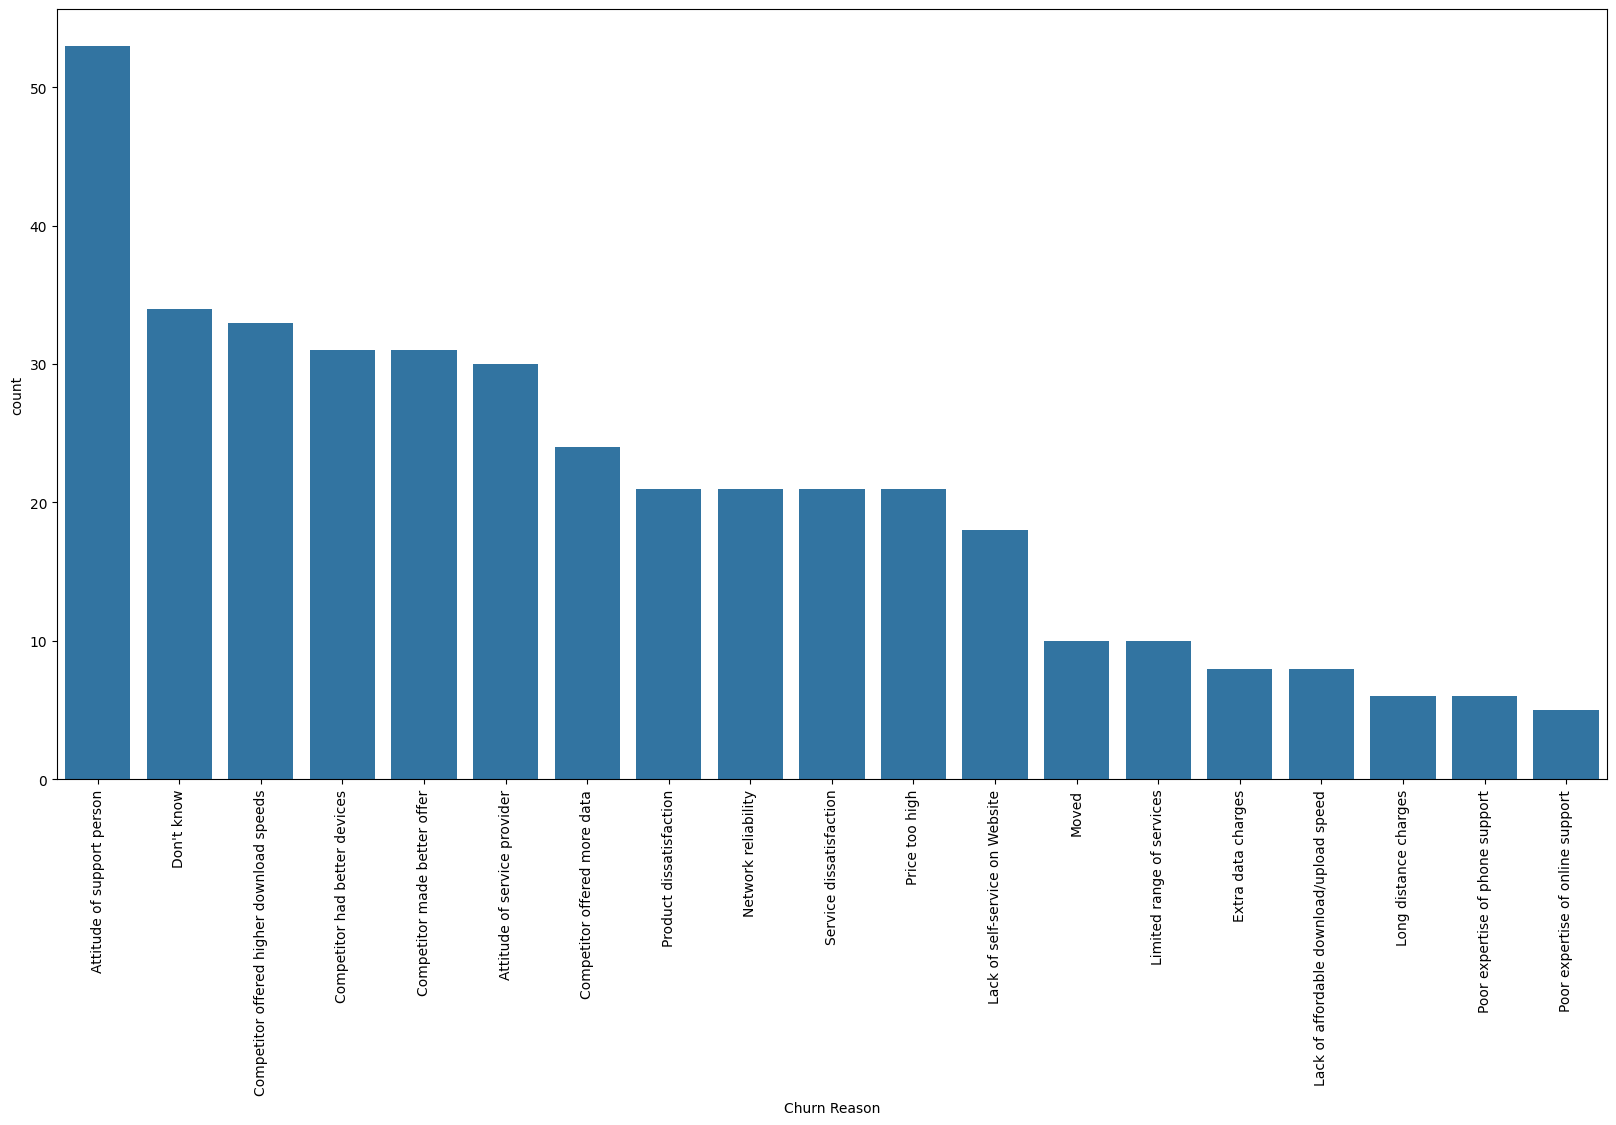

In [ ]:
print(poorActivation['Churn Value'].sum())
plt.figure(figsize=(20,10))
sns.countplot(x= 'Churn Reason', data = poorActivation, order = poorActivation['Churn Reason'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
## Overall
text = " ".join(cat for cat in cust_records['Churn Reason'][cust_records['Churn Value']==1])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

## 1st subscription
text_PA = " ".join(cat for cat in poorActivation['Churn Reason'])
word_cloud_pa = WordCloud(collocations = False, background_color = 'white').generate(text_PA)


(-0.5, 399.5, 199.5, -0.5)

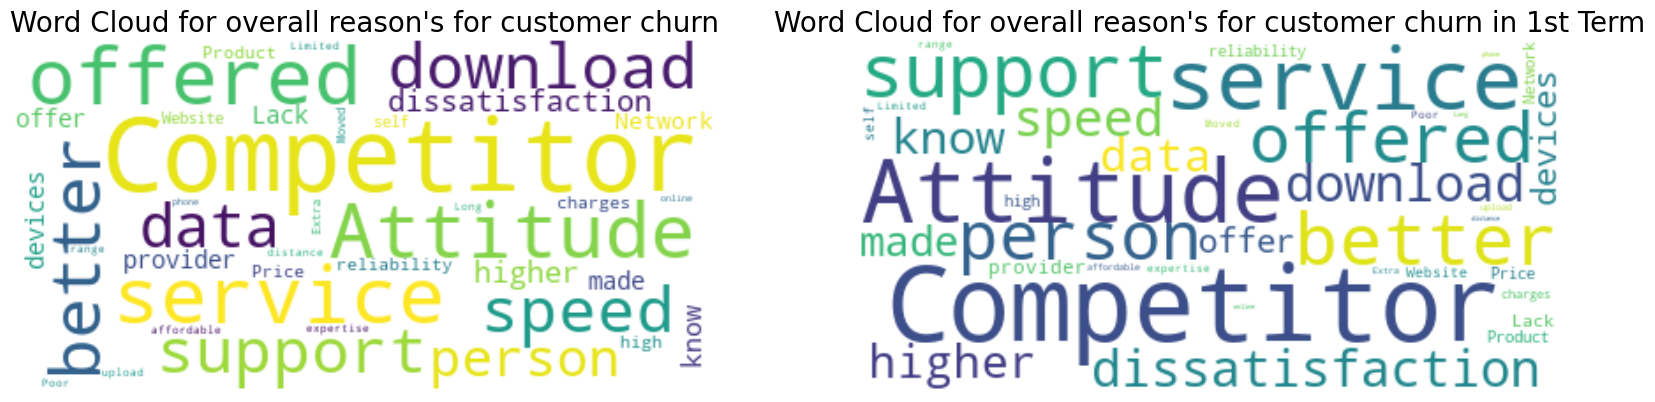

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (20,6))
ax[0].set_title("Word Cloud for overall reason's for customer churn",fontsize = 20)
ax[1].set_title("Word Cloud for overall reason's for customer churn in 1st Term",fontsize = 20)


ax[0].imshow(word_cloud, interpolation='bilinear',)
ax[0].axis("off")


ax[1].imshow(word_cloud_pa, interpolation='bilinear',)
ax[1].axis("off")


In [ ]:
overall = pd.DataFrame()
overall['Main Reason'] = cust_records['Churn Reason'].apply(lambda x: 'Competitor' if 'Competitor' in str(x) else 'Support or Service issues' if ('support' in str(x) or 'service' in str(x)) else 'Dissatisfaction' if 'dissatisfaction' in str(x) else x)
overall['First Term'] = poorActivation['Churn Reason'].apply(lambda x: 'Competitor' if 'Competitor' in str(x) else 'Support or Service issues' if ('support' in str(x) or 'service' in str(x)) else 'Dissatisfaction' if 'dissatisfaction' in str(x) else x)
overall.shape

(7037, 2)

In [ ]:
overall.fillna('N/A',inplace=True)

In [ ]:
overall.loc[overall['First Term'] != 'N/A', 'Main Reason'] = np.nan
overall.replace('N/A',np.nan,inplace=True)

In [ ]:
df_top5_ovr = overall['Main Reason'].value_counts()[:5]
df_top5_ovr.loc['Others'] = sum(overall['Main Reason'].value_counts()[5:])

df_top5_pa = overall['First Term'].value_counts()[:5]
df_top5_pa.loc['Others'] = sum(overall['First Term'].value_counts()[5:])


In [ ]:
total_ovr = overall['Main Reason'].value_counts().values.sum()
def fmt_ovr(x):
    return '{:.1f}%\n({:.0f})'.format(x, total_ovr*x/100)

total_pa = overall['First Term'].value_counts().values.sum()
def fmt_pa(x):
    return '{:.1f}%\n({:.0f})'.format(x, total_pa*x/100)


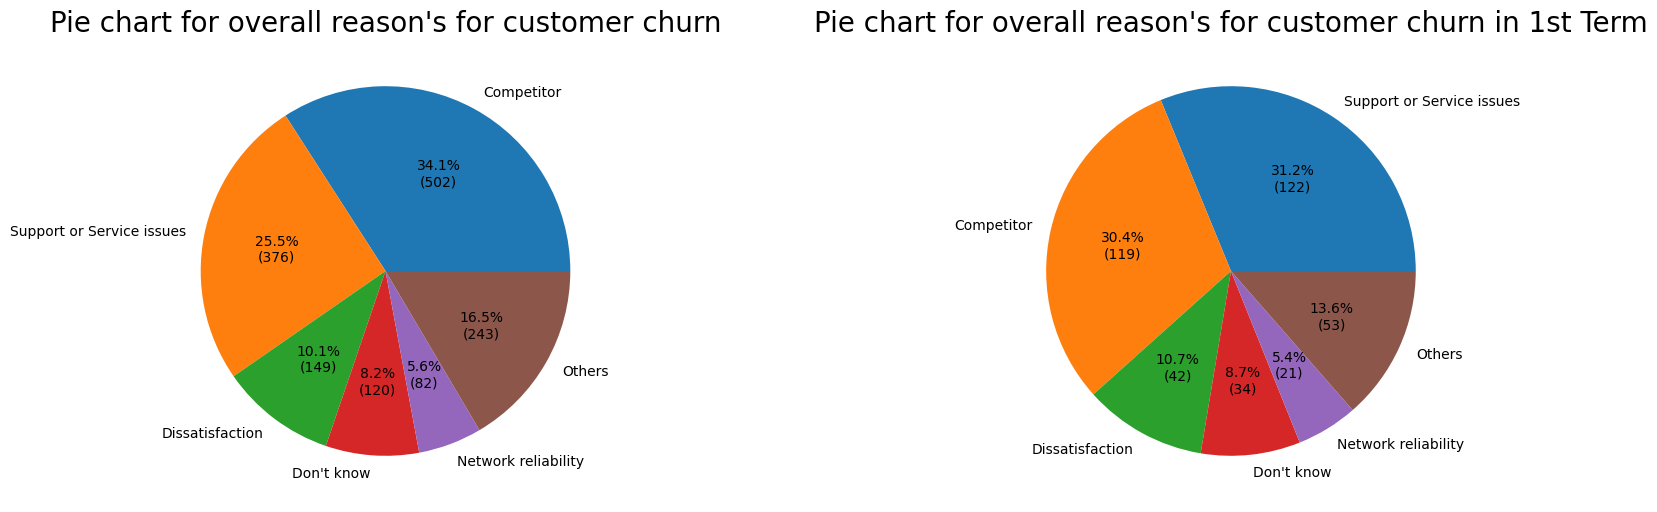

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (20,6),facecolor = 'White')

ax[0].pie(df_top5_ovr, labels = df_top5_ovr.index ,autopct=fmt_ovr)
ax[1].pie(df_top5_pa, labels = df_top5_pa.index ,autopct=fmt_pa)

ax[0].set_title("Pie chart for overall reason's for customer churn",fontsize = 20)
ax[1].set_title("Pie chart for overall reason's for customer churn in 1st Term",fontsize = 20)

plt.show()


Based on the pie chart and word cloud analyses, it is evident that the top three reasons for customer churn are competition, support or service issues, and dissatisfaction. Moreover, the analysis shows that a higher percentage of customers cancel their contract after their first term (31.5%) than those who cancel it due to support or service issues (25.4%) after first term.

Furthermore, the analysis reveals that customers who churn after the first period are more likely to be dissatisfied with the support or service they received.

In [ ]:
import pandas as pd

file_path = 'Telco_customer_churn.xlsx'
data = pd.read_excel(file_path)
filtered_df = data[data['Churn Label'] == 'Yes']
filtered_df = data[data['Churn Reason'] != 'Deceased']

In [ ]:
unique_values = filtered_df['Churn Reason'].unique()
print(unique_values)

['Competitor made better offer' 'Moved' 'Competitor had better devices'
 'Competitor offered higher download speeds'
 'Competitor offered more data' 'Price too high' 'Product dissatisfaction'
 'Service dissatisfaction' 'Lack of self-service on Website'
 'Network reliability' 'Limited range of services'
 'Lack of affordable download/upload speed' 'Long distance charges'
 'Extra data charges' "Don't know" 'Poor expertise of online support'
 'Poor expertise of phone support' 'Attitude of service provider'
 'Attitude of support person' nan]


In [ ]:
replacements = {
    'Poor expertise of online support': 'Poor expertise of support staff',
    'Poor expertise of phone support': 'Poor expertise of support staff',
    'Long distance charges': 'Extra charges',
    'Extra data charges': 'Extra charges',
    'Network reliability': 'Network Issues',
    'Limited range of services': 'Network Issues',
    'Service dissatisfaction': 'Service Dissatisfaction',
    'Lack of self-service on Website': 'Service Dissatisfaction',
    'Price too high': 'Pricing Issues',
    'Lack of affordable download/upload speed': 'Pricing Issues'
}

filtered_df['Churn Reason'] = filtered_df['Churn Reason'].replace(replacements)
unique_values_updated = filtered_df['Churn Reason'].unique()


C:\Users\017405518\AppData\Local\Temp\ipykernel_20004\1474675269.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Churn Reason'] = filtered_df['Churn Reason'].replace(replacements)


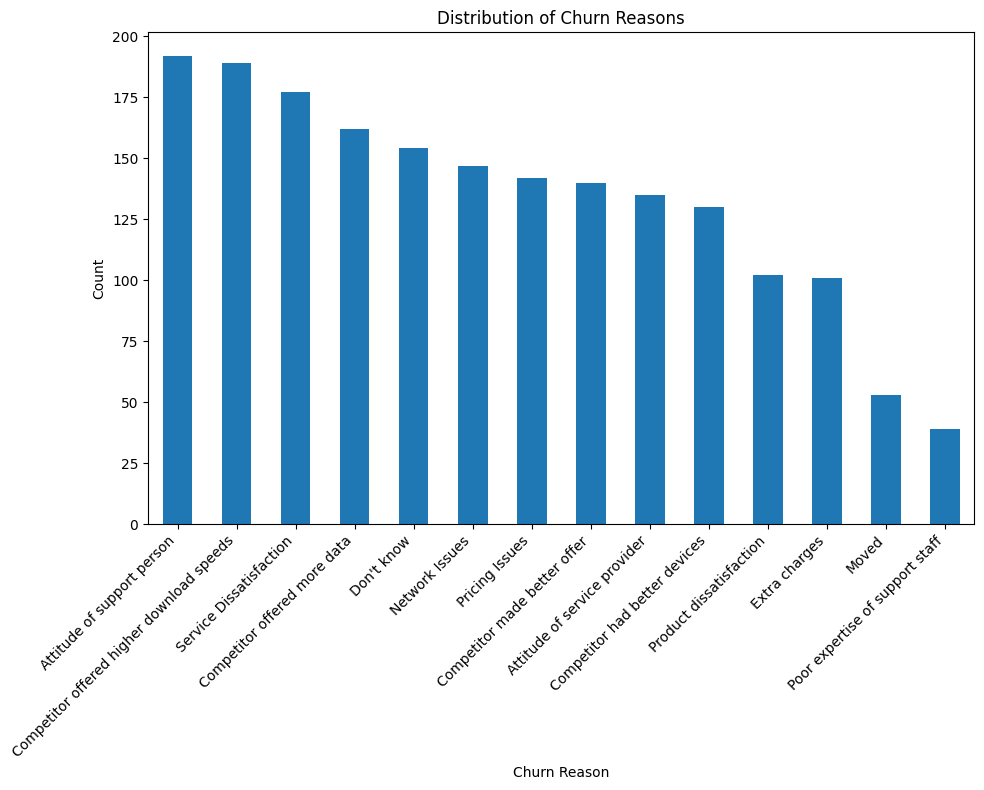

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in 'Churn Reason'
value_counts = filtered_df['Churn Reason'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 8)) 
value_counts.plot(kind='bar')
plt.title('Distribution of Churn Reasons')
plt.xlabel('Churn Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate labels to avoid overlapping
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Show the plot
plt.show()

In [ ]:
churn_reason_distribution = filtered_df['Churn Reason'].value_counts()
churn_reason_distribution

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Service Dissatisfaction                      177
Competitor offered more data                 162
Don't know                                   154
Network Issues                               147
Pricing Issues                               142
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Product dissatisfaction                      102
Extra charges                                101
Moved                                         53
Poor expertise of support staff               39
Name: count, dtype: int64

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score

# Step 1: Data Preparation
# Encode categorical variables
le = LabelEncoder()
for column in filtered_df.columns:
    if filtered_df[column].dtype == 'object' or filtered_df[column].dtype == 'category':
        filtered_df[column] = le.fit_transform(filtered_df[column].astype(str))

# Split the data into features and target
X = filtered_df.drop(['Churn Reason'], axis=1)
y = filtered_df['Churn Reason']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Setup
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Step 3: Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'colsample_bytree': [0.3, 0.7]
}

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Step 4: Model Evaluation
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1_xgb_classifier = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' to account for imbalance in the test set

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1_xgb_classifier}")



Fitting 3 folds for each of 128 candidates, totalling 384 fits
Best Parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300}
Accuracy: 0.7627840909090909
F1 Score: 0.7596516456109428


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score


le = LabelEncoder()
for column in filtered_df.columns:
    if filtered_df[column].dtype == 'object':
        filtered_df[column] = le.fit_transform(filtered_df[column].astype(str))

# Split the data into features (X) and target (y)
X = filtered_df.drop('Churn Reason', axis=1)
y = filtered_df['Churn Reason']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Setup: Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Hyperparameter Tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_

# Model Evaluation: Use the best estimator to make predictions on the test set
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1_decision_tree = f1_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for label imbalance

print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1_decision_tree}")


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.7521306818181818
F1 Score: 0.7491841862942596


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score

# Load the balanced dataset (assuming 'balanced_data' is the balanced DataFrame)
# balanced_data = pd.read_excel('/path/to/your/balanced_dataset.xlsx')

# Step 1: Data Preparation
# Encode categorical variables
le = LabelEncoder()
for column in filtered_df.columns:
    if filtered_df[column].dtype == 'object':
        filtered_df[column] = le.fit_transform(filtered_df[column].astype(str))

# Split the data into features (X) and target (y)
X = filtered_df.drop('Churn Reason', axis=1)
y = filtered_df['Churn Reason']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Setup
rf_classifier = RandomForestClassifier(random_state=42)

# Step 3: Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_

# Step 4: Model Evaluation
# Use the best estimator to make predictions on the test set
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1_random_forest = f1_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for label imbalance

print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1_random_forest}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.7592329545454546
F1 Score: 0.7502250128542809


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score

# Load the balanced dataset (assuming 'balanced_data' is the balanced DataFrame)
# balanced_data = pd.read_excel('/path/to/your/balanced_dataset.xlsx')

# Step 1: Data Preparation
# Encode categorical variables
le = LabelEncoder()
for column in filtered_df.columns:
    if filtered_df[column].dtype == 'object':
        filtered_df[column] = le.fit_transform(filtered_df[column].astype(str))

# Split the data into features (X) and target (y)
X = filtered_df.drop('Churn Reason', axis=1)
y = filtered_df['Churn Reason']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Setup
log_reg = LogisticRegression(multi_class='auto', max_iter=1000, random_state=42)

# Step 3: Hyperparameter Tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_

# Step 4: Model Evaluation
# Use the best estimator to make predictions on the test set
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1_logistic_regression = f1_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for label imbalance

print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1_logistic_regression}")


Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\017405518\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\017405518\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\017405518\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\

Best Parameters: {'C': 0.01, 'penalty': 'l2'}
Accuracy: 0.7258522727272727
F1 Score: 0.6235637195196969


C:\Users\017405518\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


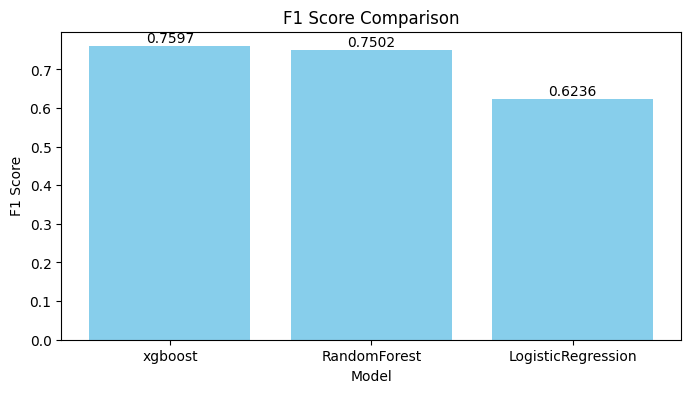

In [ ]:
import matplotlib.pyplot as plt

# Data
categories = ['xgboost', 'RandomForest', 'LogisticRegression']
values = [f1_xgb_classifier, f1_random_forest, f1_logistic_regression]

# Creating the bar graph
plt.figure(figsize=(8, 4))
bars = plt.bar(categories, values, color='skyblue')

# Adding title and labels
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')

# Adding values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.01, 
             round(value, 4), 
             ha='center', 
             color='black')

# Show the graph
plt.show()
